# Polynomial Regression

## Introduction

In the last section, you saw how you can account for interactions between two variables by including interaction effects in your model. In this section you'll learn about another way to extend your regression model by including polynomial terms.

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## An example with one predictor

The data sety "yields.csv", with just 21 cases, contains measurements of the yields from an experiment done at six different levels of temperature in degrees Fahrenheit. Let's plot them.

In [1]:
import pandas as pd
yld = pd.read_csv("yield.csv", sep='\s+', index_col = 0)
import matplotlib.pyplot as plt
yld.head()
y = yld["Yield"]

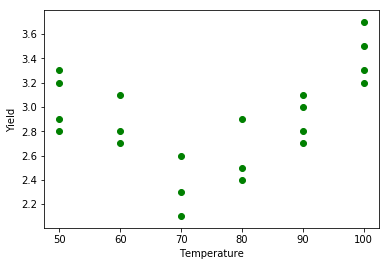

In [2]:
plt.scatter(yld["Temp"],y, color = "green")
plt.xlabel("Temperature")
plt.ylabel("Yield");

It's clear that there is no linear relationship between Yield and Temperature. Let's try and plot a line anyways and see how our model performs:

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(yld[["Temp"]], y)

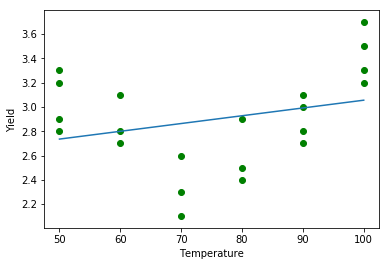

In [5]:
plt.scatter(yld["Temp"], y, color = "green")
plt.plot(yld["Temp"], reg.predict(yld[["Temp"]]))
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, reg.predict(yld[["Temp"]]))

r2_score(y, reg.predict(yld[["Temp"]])), reg.score(yld[["Temp"]], y)

(0.08605718085106373, 0.08605718085106373)

## A quadratic relationship

When relationships between predictors and outcome are not linear and show some sort of a curvature, polynomials can be used to generate better approximations. The idea is that you can transform your input variable by e.g, squaring it. The corresponding model would then be:


$\hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

The idea is simple. You can square your predictor (here, "Temp") and include it in your model as if it were a new predictor.

In [35]:
from sklearn.linear_model import LinearRegression
X = yld[["Temp"]]
X["Temp_sq"] = yld["Temp"]**2

X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


In [36]:
reg_q = LinearRegression().fit(X, y)

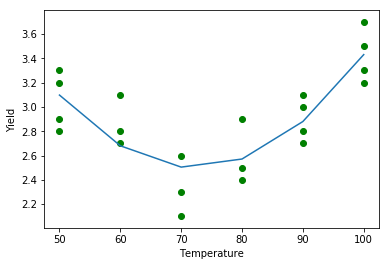

In [37]:
plt.scatter(X["Temp"],y, color = "green")
plt.plot(X["Temp"],reg_q.predict(X))
plt.xlabel("Temperature")
plt.ylabel("Yield");

This is the resulting plot. Note that the fit is much better, and this is confirmed by the $R^2$score: where it was 0.086 before, it now is 0.6948!

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, reg_q.predict(X))
r2_score(y, reg_q.predict(X))

0.6948165884110553

Note that you get a seemingly "piecewise linear" function here,  because the yields were only measured at 50, 60, 70, 80, 90 and 100. In reality, this model generates a smooth curve, as denoted below.

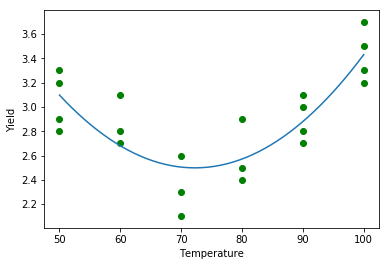

In [39]:
import numpy as np
plt.scatter(X["Temp"],y, color = "green")

X_pred = pd.DataFrame(np.linspace(50,100,50), columns = ["temp"])
X_pred["sq"] = X_pred**2 
y_pred = reg_q.predict(X_pred)

plt.plot(X_pred["temp"],y_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield");

## Higher order relationships

The use of polynomials is not restricted to quadratic relationships, you can explore cubic relationships,... as well! Imagine you want to go until the power of 10, it would be quite annoying to transform your variable 9 times. Of course, Scikit-Learn has a built-in Polynomial option in the `preprocessing` library! Let's call it with a polynomial of 5!

In [40]:
from sklearn.preprocessing import PolynomialFeatures

y = yld["Yield"]
X = yld[["Temp"]]

poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X)

reg_poly = LinearRegression().fit(X_fin, y)
predict_X = reg_poly.predict(X_fin)

In [41]:
X_linspace = pd.DataFrame(np.linspace(50,100,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

y_poly_pred = reg_poly.predict(X_linspace_fin)

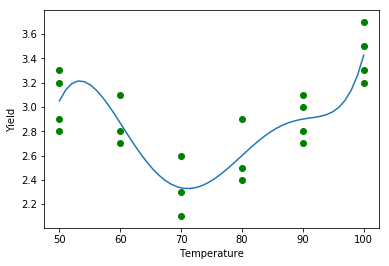

In [42]:
plt.scatter(X["Temp"],y, color = "green")
plt.plot(X_linspace,y_poly_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield");

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, reg_poly.predict(X_fin))
r2_score(y, reg_poly.predict(X_fin))

0.7591145833332826

This seems to be a pretty smooth fit! This good fit is also confirmed with an even better $R^2$). Do note that by adding polynomials, you make your model more complex. Instead of just having 2 parameters ($\beta_0$ and $\beta_1$) for a linear model, you now have 7 (one for the intercept, and 6 for the terms when going until a polynomial with degree 6). More on that later!

## Summary

Great! You now know how to include polynomials in your linear model. Let's go ahead and practice this knowledge!